___
# PROJETO 3

## GRUPO:
### Gabriel Noal
### Warlen Rodrigues
___

In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math
import matplotlib.mlab as mlab

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dell\Documents\GitHub\CD1S17\Projeto 3\Entrega 2


1. a) Definindo a distribuição Lognormal.
   
   b) Sorteando os valores...

In [2]:
dados = sorted(stats.lognorm.rvs(0.25,scale=20,loc=10,size=1000000))

df = pd.DataFrame()
df["dados"] =dados

___
## Estudo da Distribuição da Média Amostral  $\bar{X}$  via SIMULAÇÃO

1. c) Calculando média, variância e Desvio-Padrão

In [3]:
print("Média:",round(df.dados.mean(),2))
print("Variancia:",round(df.dados.var(),2))
print("Desvio Padrão:",round(df.dados.std(),2))

Média: 30.64
Variancia: 27.48
Desvio Padrão: 5.24


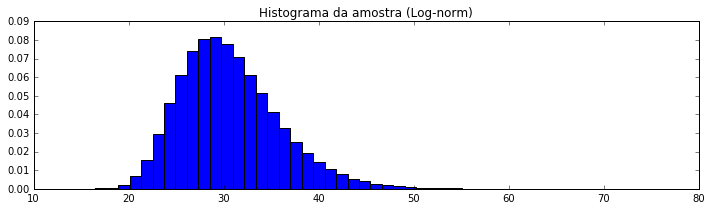

In [4]:
fig = plt.figure(figsize=(10,3))

plt.subplot(111)

plt.hist(df.dados,bins=50,normed=1)
plt.title("Histograma da amostra (Log-norm)")


plt.tight_layout()
plt.show()

Criando função que gera as distribuições das médias amostrais.

In [5]:
def medias_amostrais(n):
    lista=[]
    for i in range (n):
        lista.append(np.random.choice(df.dados))
    media = sum(lista)/n
    #print("Quando n={0}, a média é:{1}".format(n,media))
    return media

Considerando n=2

In [6]:
medias_2 = []
for i in range (10000):
    medias_2.append(medias_amostrais(2))


Considerando n=4

In [7]:
medias_4 = []
for i in range (10000):
    medias_4.append(medias_amostrais(4))


Considerando n=20

In [8]:
medias_20 = []
for i in range (10000):
    medias_20.append(medias_amostrais(20))

Considerando n=50

In [9]:
medias_50 = []
for i in range (10000):
    medias_50.append(medias_amostrais(50))


30.702267287980742
13.948590416379552


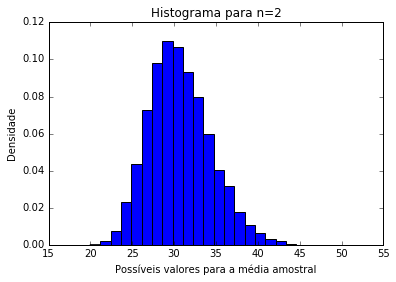

In [10]:
media = pd.DataFrame()
media["n2"] = medias_2
media["n4"] = medias_4
media["n20"] = medias_20
media["n50"] = medias_50

plt.hist(media.n2,bins=25,normed=1)
plt.title("Histograma para n=2")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")


print(media.n2.mean())
print(media.n2.var())


30.655116292345408
6.9513127421012735


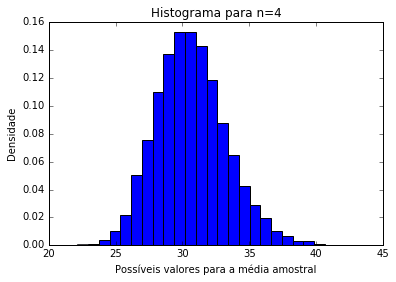

In [11]:
plt.hist(media.n4,bins=25,normed=1)
plt.title("Histograma para n=4")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

print(media.n4.mean())
print(media.n4.var())

30.626011532785142
1.3898126423365023


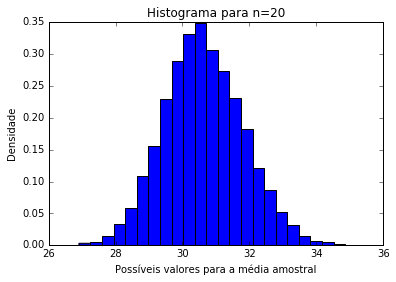

In [12]:
plt.hist(media.n20,bins=25,normed=1)
plt.title("Histograma para n=20")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

print(media.n20.mean())
print(media.n20.var())

30.653922969222208
0.5354836391821861


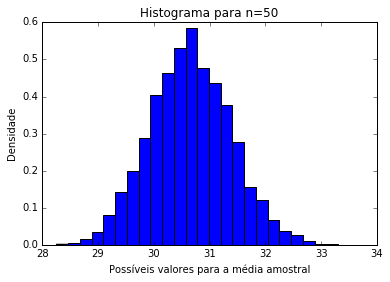

In [13]:
plt.hist(media.n50,bins=25,normed=1)
plt.title("Histograma para n=50")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")
print(media.n50.mean())
print(media.n50.var())

O TLC nos mostra que a distribuição das médias amostrais se comporta de modo que, quanto maior for o "n", mais a distribuição das médias se parece com uma normal. Ou seja, quanto mais valores pegarmos dentro das médias populacionais, maior é a probabilidade de a nossa média amostral ser igual à média escolhida para ser aplicada ao modelo teórico escolhido. 

Por exemplo: no item 1. a) tinhamos uma média de 30.64. É possível perceber que as médias das distribuições obtidas para diferentes valores de n se aproxima bastante de 30.64 a medida que n vai recebendo valores mais altos.

In [14]:
x3 =[]
x15=[]
for i in range (10000):
    medias = []
    for i in range (20):
        medias.append(medias_amostrais(50))
    x15.append(medias[14])
    x3.append(medias[2])


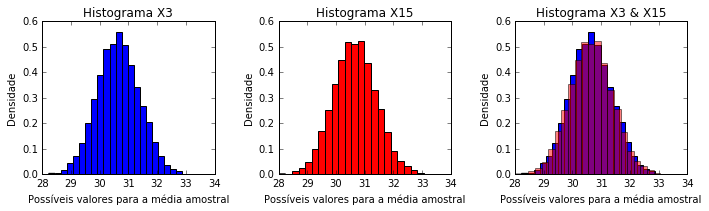

In [15]:
fig = plt.figure(figsize=(10,3))

plt.subplot(131)
plt.hist(x3,bins=25,normed=1, color = 'blue')
plt.title("Histograma X3")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

plt.subplot(132)
plt.hist(x15,bins=25,normed=1, color='red', alpha=1)
plt.title("Histograma X15")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

plt.subplot(133)
plt.hist(x3,bins=25,normed=1,alpha=1, color='blue')
plt.hist(x15,bins=25,normed=1, color='red', alpha=0.5)
plt.title("Histograma X3 & X15")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

plt.tight_layout()
plt.show()

In [16]:
print("Média de X3:",np.mean(x3))
print("Média de X15:",np.mean(x15))
print("Variancia de X3:",np.var(x3))
print("Variancia de X15:",np.var(x15))

Média de X3: 30.6489172177
Média de X15: 30.6503147418
Variancia de X3: 0.541754329744
Variancia de X15: 0.559705575712


In [17]:
print("Correlação(X3,X15):",np.corrcoef(x3,x15)[0][1])

Correlação(X3,X15): 0.0145455228251


___
## Estudo da Distribuição de  $\frac{\bar{X}-\mu}{\sigma\hspace{1mm}/\sqrt{n}}$  e de $\frac{\bar{X}-\mu}{S\hspace{1mm}/\sqrt{n}}$ via SIMULAÇÃO

In [122]:
mi = 30
sigma = 0.74
a = stats.norm.rvs(loc=mi, scale=sigma, size=1000000)
medpop = a.mean()
sigmapop = a.std()

dados_2 = sorted(a)

df = pd.DataFrame()
df["dados"] = dados_2

Criando a função que retorna a média e o desvio padrão das amostras para diferentes valores de n

In [156]:

def medias_amostrais_2(n):
    lista=[]
    for i in range (n):
        lista.append(np.random.choice(df.dados))
    media = (sum(lista))/n
    std = np.std(lista)
    return media, std

#Para n=4
medias_4 = []
for i in range (10000):
    medias_4.append(medias_amostrais_2(4)[0])

desvpad_4 = []
for i in range (10000):
    desvpad_4.append(medias_amostrais_2(4)[1])

#Para n=20    
medias_20 = []
for i in range (10000):
    medias_20.append(medias_amostrais_2(20)[0])

desvpad_20 = []
for i in range (10000):
    desvpad_20.append(medias_amostrais_2(20)[1])

#Para n=50
medias_50 = []
for i in range (10000):
    medias_50.append(medias_amostrais_2(50)[0])

desvpad_50 = []
for i in range (10000):
    desvpad_50.append(medias_amostrais_2(50)[1])

Criando DataFrame para acessar os dados com maior facilidade

In [157]:
valores = pd.DataFrame()
valores["Medias4"] = medias_4
valores['Desvpad4'] = desvpad_4
valores["Medias20"] = medias_20
valores['Desvpad20'] = desvpad_20
valores["Medias50"] = medias_50
valores['Desvpad50'] = desvpad_50


Criando funções que calculam Z e T

In [134]:
def calcular_z (medpop, mi, sigma, n):
    z = (medpop-mi)/(sigma/((n)**0.5))
    return z

def calcular_t (medpop, mi, s, n):
    t = (medpop-mi)/(s/((n)**0.5))
    return t

### Tendo n=4

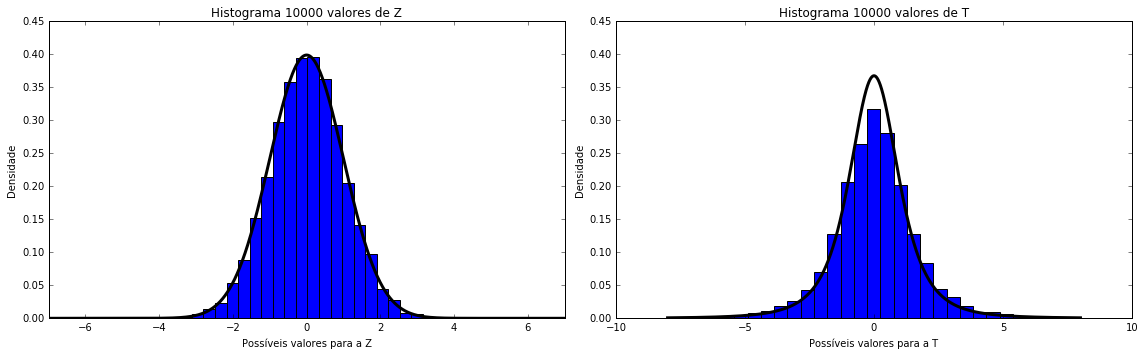

In [153]:
lista_z = []

for i in range (10000):
    lista_z.append(calcular_z(valores.Medias4[i], medpop, sigmapop, 4))


lista_t = []
for i in range (10000):
    lista_t.append(calcular_t(valores.Medias4[i], medpop, desvpad_4[i], 4))


fig = plt.figure(figsize=(16,5))
mu = 0
variance = 1
sigma_1 = math.sqrt(variance)
x = np.linspace(-8, 8, 10000)

plt.subplot(121)
plt.hist(lista_z,bins=25,normed=1)
plt.plot(x,mlab.normpdf(x, mu, sigma_1), lw=3, color='black')
plt.title("Histograma 10000 valores de Z")
plt.xlabel("Possíveis valores para a Z")
plt.ylabel("Densidade")
plt.ylim(0, 0.45)
plt.xlim(-7,7)

plt.subplot(122)
plt.hist(lista_t,bins=150,normed=1)
plt.plot(x, stats.t.pdf(x,df=3), lw=3, color='black')
plt.title("Histograma 10000 valores de T")
plt.xlabel("Possíveis valores para a T")
plt.ylabel("Densidade")
plt.ylim(0,0.45)
plt.xlim(-10,10)

plt.tight_layout()
plt.show()

### Tendo n=20

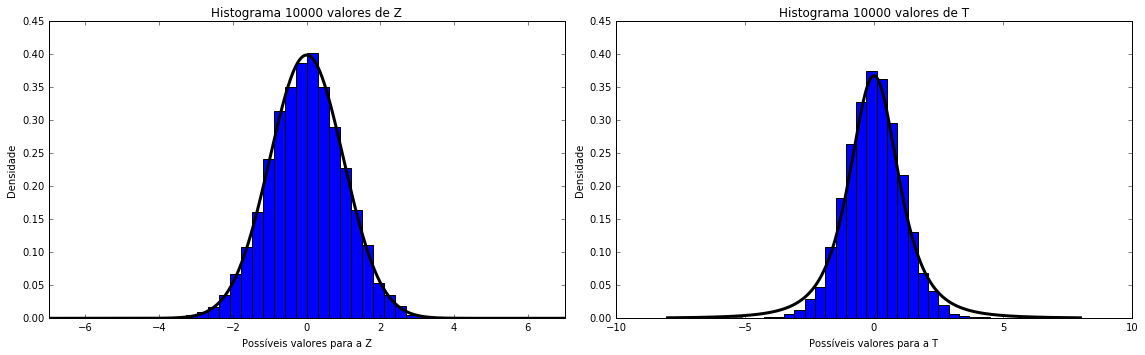

In [161]:
lista_z = []

for i in range (10000):
    lista_z.append(calcular_z(valores.Medias20[i], medpop, sigmapop, 20))


lista_t = []
for i in range (10000):
    lista_t.append(calcular_t(valores.Medias20[i], medpop, desvpad_20[i], 20))


fig = plt.figure(figsize=(16,5))
mu = 0
variance = 1
sigma_1 = math.sqrt(variance)
x = np.linspace(-8, 8, 10000)

plt.subplot(121)
plt.hist(lista_z,bins=25,normed=1)
plt.plot(x,mlab.normpdf(x, mu, sigma_1), lw=3, color='black')
plt.title("Histograma 10000 valores de Z")
plt.xlabel("Possíveis valores para a Z")
plt.ylabel("Densidade")
plt.ylim(0, 0.45)
plt.xlim(-7,7)

plt.subplot(122)
plt.hist(lista_t,bins=25,normed=1)
plt.plot(x, stats.t.pdf(x,df=3), lw=3, color='black')
plt.title("Histograma 10000 valores de T")
plt.xlabel("Possíveis valores para a T")
plt.ylabel("Densidade")
plt.ylim(0,0.45)
plt.xlim(-10,10)

plt.tight_layout()
plt.show()

### Tendo n=50

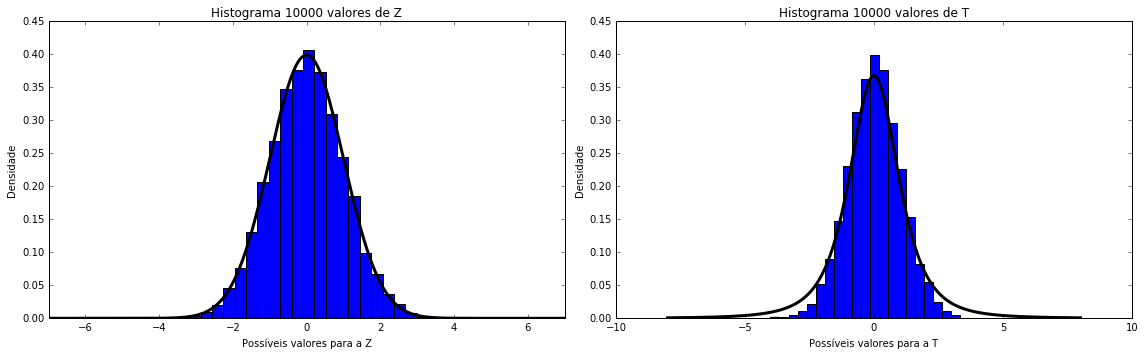

In [162]:
lista_z = []

for i in range (10000):
    lista_z.append(calcular_z(valores.Medias50[i], medpop, sigmapop, 50))


lista_t = []
for i in range (10000):
    lista_t.append(calcular_t(valores.Medias50[i], medpop, desvpad_50[i], 50))


fig = plt.figure(figsize=(16,5))
mu = 0
variance = 1
sigma_1 = math.sqrt(variance)
x = np.linspace(-8, 8, 10000)

plt.subplot(121)
plt.hist(lista_z,bins=25,normed=1)
plt.plot(x,mlab.normpdf(x, mu, sigma_1), lw=3, color='black')
plt.title("Histograma 10000 valores de Z")
plt.xlabel("Possíveis valores para a Z")
plt.ylabel("Densidade")
plt.ylim(0, 0.45)
plt.xlim(-7,7)

plt.subplot(122)
plt.hist(lista_t,bins=25,normed=1)
plt.plot(x, stats.t.pdf(x,df=3), lw=3, color='black')
plt.title("Histograma 10000 valores de T")
plt.xlabel("Possíveis valores para a T")
plt.ylabel("Densidade")
plt.ylim(0,0.45)
plt.xlim(-10,10)

plt.tight_layout()
plt.show()

### Conclusão

É possível perceber que através do resultado 1, que tem como fórmula $\frac{\bar{X}-\mu}{\sigma\hspace{1mm}/\sqrt{n}}$ e que leva sigma como sendo o desvio padrão da amostra como um todo, o modelo se aproxima muito de uma normal padrão independente do valor assumido por n. Já no resultado 2, que tem como fórmula $\frac{\bar{X}-\mu}{S\hspace{1mm}/\sqrt{n}}$ e leva como sigma o desvio padrão das amostras populacionais, é possível perceber que o modelo também se aproxima de uma normal padrão para qualquer valor de n.